In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

## task 1

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
diabetes = load_diabetes()

In [4]:
diabetes['target']

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

## TASK 2

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.3, random_state=1004)

## TASK 3

In [7]:
from sklearn.linear_model import Lasso

In [8]:
lasso_model = Lasso()

In [9]:
lasso_model.fit(X_train,y_train)

Lasso()

In [10]:
y_pred=lasso_model.predict(X_test)

In [11]:
result1=lasso_model.score(X_train,y_train)

In [12]:
result2=lasso_model.score(X_test,y_test)

In [13]:
result3=sum(lasso_model.coef_!=0)

In [14]:
Feature=diabetes.feature_names
Feature

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [15]:
ind=np.where(lasso_model.coef_!=0)

In [16]:
lasso_model.coef_

array([  0.        ,  -0.        , 393.17316743,   0.        ,
         0.        ,   0.        ,  -0.        ,   0.        ,
       186.04610763,   0.        ])

In [17]:
[Feature[ind[0][i]] for i in range(len(ind[0]))]

['bmi', 's5']

## TASK 4

In [18]:
df=pd.read_csv('diabetes.data',sep='\t')

In [19]:
df

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


## TASK 5

In [20]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(df.drop('Y',axis=1), df.Y, test_size=0.3, random_state=1004)

## TASK 6

In [21]:
lasso_model1 = Lasso()

In [22]:
lasso_model1.fit(X_train1,y_train1)

Lasso()

In [23]:
result4=lasso_model1.score(X_train1,y_train1)

In [24]:
result5=lasso_model1.score(X_test1,y_test1)

In [25]:
result6=sum(lasso_model1.coef_!=0)

In [26]:
ind1=np.where(lasso_model1.coef_!=0)

In [27]:
[Feature[ind1[0][i]] for i in range(len(ind1[0]))]

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [28]:
lasso_model1.coef_

array([  0.02874905, -21.61685604,   6.07763861,   1.13538207,
         0.36900301,  -0.51683162,  -1.20836045,   0.4145911 ,
        21.06771504,   0.11987142])

## TASK 7

In [29]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [30]:
scale.fit(X_train1)
X_train1=scale.transform(X_train1)
X_test1=scale.transform(X_test1)

In [31]:
X_train1

array([[ 0.3336538 ,  1.07742246, -0.00251616, ...,  1.20858937,
         0.53823115,  0.72573074],
       [ 0.3336538 ,  1.07742246, -0.46901287, ...,  0.74923621,
        -0.08512601,  0.02439908],
       [ 1.49555114,  1.07742246, -0.62451177, ..., -1.04146253,
        -0.75486728,  0.19973199],
       ...,
       [-0.44094443, -0.92814104, -1.35757802, ..., -1.58645779,
        -0.7273385 , -0.85226549],
       [ 0.64349309,  1.07742246,  0.3529099 , ...,  1.52780088,
        -1.95406617, -1.20293132],
       [ 1.88285025,  1.07742246,  0.90826311, ..., -0.02932846,
         0.09984476, -0.50159966]])

## TASK 8

In [32]:
lasso_model2 = Lasso()

In [33]:
lasso_model2.fit(X_train1,y_train1)

Lasso()

In [34]:
result7=lasso_model2.score(X_train1,y_train1)
result7

0.48673801741856626

In [35]:
result8=lasso_model2.score(X_test1,y_test1)
result8

0.5278591178183369

In [36]:
result9=sum(lasso_model2.coef_!=0)

In [37]:
ind2=np.where(lasso_model2.coef_!=0)

In [38]:
[Feature[ind2[0][i]] for i in range(len(ind2[0]))]

['sex', 'bmi', 'bp', 's1', 's3', 's5', 's6']

**Explanation**
* The Task 8 result is closure to Task 6
* The Task 3 and Task 6 are different because, for approaches that use regularisation, normalisation is crucial. This is due to the fact that the scale of the variables influences how much regularisation is applied to each variable.

## TASK 9

In [39]:
test_r2 = np.zeros((100))
features = np.zeros((100))

In [40]:
alphas = 5**np.linspace(20,-5,100)*0.5
alphas

array([4.76837158e+13, 3.17586852e+13, 2.11521704e+13, 1.40879357e+13,
       9.38295824e+12, 6.24931199e+12, 4.16221615e+12, 2.77215209e+12,
       1.84633064e+12, 1.22970772e+12, 8.19019652e+11, 5.45489940e+11,
       3.63311520e+11, 2.41975609e+11, 1.61162507e+11, 1.07338726e+11,
       7.14905867e+10, 4.76147255e+10, 3.17127357e+10, 2.11215668e+10,
       1.40675528e+10, 9.36938267e+09, 6.24027028e+09, 4.15619412e+09,
       2.76814125e+09, 1.84365931e+09, 1.22792854e+09, 8.17834667e+08,
       5.44700707e+08, 3.62785869e+08, 2.41625511e+08, 1.60929332e+08,
       1.07183425e+08, 7.13871518e+07, 4.75458349e+07, 3.16668526e+07,
       2.10910074e+07, 1.40471994e+07, 9.35582674e+06, 6.23124165e+06,
       4.15018080e+06, 2.76413621e+06, 1.84099184e+06, 1.22615193e+06,
       8.16651397e+05, 5.43912616e+05, 3.62260978e+05, 2.41275919e+05,
       1.60696494e+05, 1.07028349e+05, 7.12838665e+04, 4.74770440e+04,
       3.16210360e+04, 2.10604923e+04, 1.40268755e+04, 9.34229043e+03,
      

In [41]:
for i in range(len(alphas)):
    lasso_model3 = Lasso(max_iter=10000,alpha=alphas[i])
    lasso_model3.fit(X_train1,y_train1)
    test_r2[i-1]=lasso_model3.score(X_test1,y_test1)
    features[i-1] = sum(lasso_model3.coef_!=0)

In [42]:
import seaborn as sns

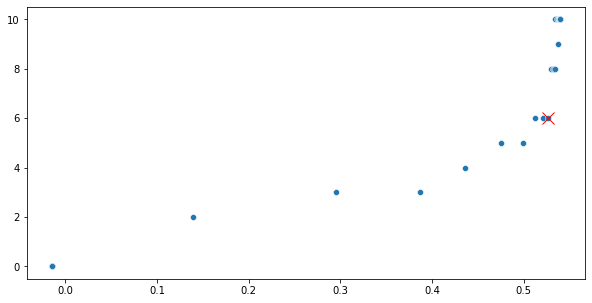

In [43]:
fig= plt.subplots(figsize=(10,5))
sns.scatterplot(x=test_r2,y=features)
x1=test_r2[np.where(features==6)][-1]
y1=6
plt.plot(x1,y1,'rx',markersize=12)

In [44]:
best_alpha=alphas[np.where(features==6)][-1]

In [45]:
r2=test_r2[np.where(features==6)][-1]

In [46]:
print(f'best_alpha = {best_alpha}')
print(f'test_r2 = {r2}')
print('features = 6')

best_alpha = 1.835668477852773
test_r2 = 0.526159881398498
features = 6


**Explanation**
* **X cross** on the graph is the point I choosen, because,
* It has best r^2 value, means less varience on the test data compared to other points 
* Has good amount of features (features = 6) to avoid bias
* Overall, the model fit the data at that point, when compared to other points.

## TASK 10

In [47]:
from sklearn.linear_model import LassoCV

In [48]:
lasso_model4=LassoCV(cv=10,random_state=1004)

In [49]:
lasso_model4.fit(X_train1,y_train1)

LassoCV(cv=10, random_state=1004)

In [50]:
result10=lasso_model4.score(X_train1,y_train1)

In [51]:
result11=lasso_model4.score(X_test1,y_test1)

In [52]:
result12=sum(lasso_model4.coef_!=0)

## TASK 11

In [53]:
X_train2, X_valid, y_train2, y_valid = train_test_split(X_train1, y_train1, test_size=99, random_state=1004)

In [54]:
X_valid.shape

(99, 10)

In [55]:
lasso_model5 = Lasso()

In [56]:
lasso_model5.fit(X_train2,y_train2)

Lasso()

In [57]:
y_predict = lasso_model5.predict(X_valid)

In [58]:
sort_conf_score = np.sort(abs(y_valid-y_predict))

In [59]:
eps = np.array([0.05,0.2])
m = len(y_valid)

In [60]:
k=np.ceil((1-eps)*(m+1)).astype(int)

In [61]:
c=sort_conf_score[k]

In [62]:
point_pred=lasso_model5.predict(X_test1)

In [63]:
interval1=np.zeros((len(point_pred),2))
interval2=np.zeros((len(point_pred),2))

In [64]:
interval1[:,0]=point_pred-c[0]
interval1[:,1]=point_pred+c[0]

In [65]:
interval2[:,0]=point_pred-c[1]
interval2[:,1]=point_pred+c[1]

In [66]:
result13 = interval1[0][1]-interval1[0][0]
result14 = interval2[0][1]-interval2[0][0]

In [67]:
a=len(y_test1[(y_test1 > interval1[:,0]) & (y_test1 < interval1[:,1])])
result15 = 1-(a/len(y_test1))

In [68]:
b=len(y_test1[(y_test1 > interval2[:,0]) & (y_test1 < interval2[:,1])])
result16 = 1-(b/len(y_test1))

## RESULT

In [69]:
print(f"1. Scikit version Traning r^2 is {result1}")
print(f"2. Scikit version Testing r^2 is {result2}")
print(f"3. Scikit version number of features is {result3}")
print('\n')
print(f"4. Orginal version Training r^2 is {result4}")
print(f"5. orginal version Testing r^2 is {result5}")
print(f"6. Orginal version number of features is {result6}")
print('\n')
print(f"7. Normalized Orginal version Training r^2 is {result7}")
print(f"8. Normalized orginal version Testing r^2 is {result8}")
print(f"9. Normalized Orginal version number of features is {result9}")
print('\n')
print(f"10. Cross_validation version Training r^2 is {result10}")
print(f"11. Cross_validation version Testing r^2 is {result11}")
print(f"12. Cross_validation version number of features is {result12}")
print('\n')
print(f"13. Length of the prediction test interval for 5% significance is {result13}")
print(f"14. Length of the prediction test interval for 20% significance is {result14}")
print(f"15. test_error_rate for 5% significance is {result15}")
print(f"16. test_error_rate for 20% significance is {result16}")

1. Scikit version Traning r^2 is 0.32312008880459675
2. Scikit version Testing r^2 is 0.297929843064623
3. Scikit version number of features is 2


4. Orginal version Training r^2 is 0.48307902757812216
5. orginal version Testing r^2 is 0.5237731588612056
6. Orginal version number of features is 10


7. Normalized Orginal version Training r^2 is 0.48673801741856626
8. Normalized orginal version Testing r^2 is 0.5278591178183369
9. Normalized Orginal version number of features is 7


10. Cross_validation version Training r^2 is 0.4847602951181067
11. Cross_validation version Testing r^2 is 0.5238228292777403
12. Cross_validation version number of features is 6


13. Length of the prediction test interval for 5% significance is 232.62399984939435
14. Length of the prediction test interval for 20% significance is 157.28426247133746
15. test_error_rate for 5% significance is 0.03007518796992481
16. test_error_rate for 20% significance is 0.19548872180451127


**Task9 Explanation**
* **X cross** on the graph is the point I choosen, because,
* It has maximum r^2 value, means less varience on the test data compared to other points 
* Has good amount of features to avoid bias
* Overall, the model fit the data at that point, when compared to other points.

**Task8 Explanation**
* The Task 8 result is closure to Task 6
* The Task 3 and Task 6 are different because, for approaches that use regularisation, normalisation is crucial. This is due to the fact that the scale of the variables influences how much regularisation is applied to each variable.